## Model Training

#### 1.1 Importing Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing ML models

In [2]:
# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Importing the CSV Data as Pandas DataFrame
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['writing_score'],axis=1)

In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [7]:
Y = df['writing_score']

In [8]:
Y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing_score, Length: 1000, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
                [
                    ("OneHotEncoder", oh_transformer, cat_features),
                    ("StandardScaler", numeric_transformer, num_features)      
                ]
                )

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Model Training

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Support Vector Regressor": SVR(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor()
}
model_list1 = []
r2_list1 =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list1.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list1.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3762
- Mean Absolute Error: 2.7105
- R2 Score: 0.9498
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8672
- Mean Absolute Error: 3.1984
- R2 Score: 0.9379


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 3.3740
- Mean Absolute Error: 2.7102
- R2 Score: 0.9499
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8612
- Mean Absolute Error: 3.2005
- R2 Score: 0.9381


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 4.5135
- Mean Absolute Error: 3.6478
- R2 Score: 0.9104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9256
- Mean Absolute Error: 3.8964
- R2 Score: 0.8993


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 5.5885
- Mean Absolute Error: 4.6057
- R2 Score: 0.8626
------------

### Results

In [15]:
best_model=pd.DataFrame(list(zip(model_list1, r2_list1)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

#### Model Training using Hyperparameter tuning

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Support Vector Regressor": SVR(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor()
    }

params = {
    "Linear Regression":{},
    "Lasso Regression":{
        'alpha':[10,1,.1,.01,.05,.001]
        },
    "Ridge Regression":{
        'alpha':[10,1,.1,.01,.05,.001],
        'solver':['auto','svd','cholesky','lspr','saga']
        },
    "ElasticNet":{
        'alpha':[10,1,.1,.01,.05,.001],
        'selection':['cyclic','random']
        },
    "Support Vector Regressor":{
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],       
        'epsilon': [0.01, 0.1, 0.5],     
        'gamma': ['scale', 'auto'] 
        },
    "KNeighbors Regressor":{
        'n_neighbors': [3, 4, 5, 6],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric': ['minkowski', 'euclidean', 'manhattan'] 
        },
    "Decision Tree Regressor":{
        'criterion':['gini','entropy','log_loss','squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter':['best','random'],
        'max_features':['sqrt','log2'],
        },
    "Random Forest Regressor":{
        'criterion':['gini','entropy','log_loss','squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_features':['sqrt','log2',None],
        'n_estimators': [8,16,32,64,128,256]
        },
    "AdaBoost Regressor":{
        'learning_rate':[.1,.01,0.5,.001],
        'loss':['linear','square','exponential'],
        'n_estimators': [8,16,32,64,128,256]
        },
    "Gradient Boosting Regressor":{
        'loss':['log_loss','exponential','squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate':[.1,.01,.05,.001],
        'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
        'criterion':['mse','mae','squared_error', 'friedman_mse','absolute_error'],
        'max_features':['auto','sqrt','log2'],
        'n_estimators': [8,16,32,64,128,256]
        },
    "XGBRegressor":{
        'booster':['gbtree','gblinear','dart'],
        'learning_rate':[.1,.01,.05,.001],
        'n_estimators': [8,16,32,64,128,256],
        'tree_method':['auto','exact','approx','hist','gpu_hist'],
        }
    }

model_list2 = []
r2_list2 =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    param = params[list(models.keys())[i]]

    model_list2.append(list(models.keys())[i])
    gs = GridSearchCV(model,param,cv=5)
    gs.fit(X_train,Y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train,Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list2.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3762
- Mean Absolute Error: 2.7105
- R2 Score: 0.9498
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8672
- Mean Absolute Error: 3.1984
- R2 Score: 0.9379


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 3.3740
- Mean Absolute Error: 2.7102
- R2 Score: 0.9499
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8611
- Mean Absolute Error: 3.2003
- R2 Score: 0.9381


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 3.3740
- Mean Absolute Error: 2.7100
- R2 Score: 0.9499
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8605
- Mean Absolute Error: 3.1995
- R2 Score: 0.9382


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 3.3740
- Mean Absolute Error: 2.7101
- R2 Score: 0.9499
------------

In [17]:
best_hyperparameter_model=pd.DataFrame(list(zip(model_list2, r2_list2)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [18]:
print('Accuracy of model before Hyperparameter tuning -')
print(best_model)
print('='*35)
print('Accuracy of model after Hyperparameter tuning -')
print(best_hyperparameter_model)

Accuracy of model before Hyperparameter tuning -
                     Model Name  R2_Score
1              Ridge Regression  0.938143
0             Linear Regression  0.937950
9   Gradient Boosting Regressor  0.932584
7       Random Forest Regressor  0.916849
10                 XGBRegressor  0.915462
8            AdaBoost Regressor  0.910052
2              Lasso Regression  0.899336
5          KNeighbors Regressor  0.880506
6       Decision Tree Regressor  0.854865
3                    ElasticNet  0.853464
4      Support Vector Regressor  0.793851
Accuracy of model after Hyperparameter tuning -
                     Model Name  R2_Score
10                 XGBRegressor  0.938265
4      Support Vector Regressor  0.938186
2              Lasso Regression  0.938164
3                    ElasticNet  0.938152
1              Ridge Regression  0.938146
0             Linear Regression  0.937950
9   Gradient Boosting Regressor  0.926401
7       Random Forest Regressor  0.915731
8            AdaBoost

## Taking top 3 best models 

#### 1. XGBRegressor

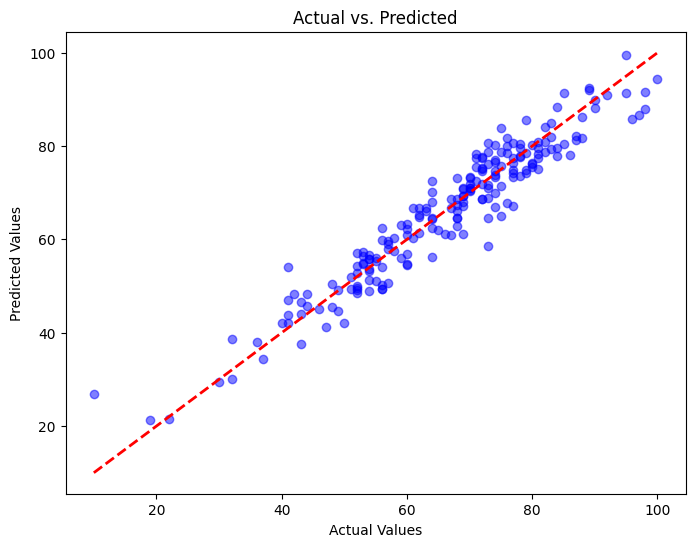

In [19]:
regressor=XGBRegressor()
regressor.fit(X_train, Y_train) # Train model

# Predictions
Y_train_pred = regressor.predict(X_train)
Y_pred = regressor.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color="blue", alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

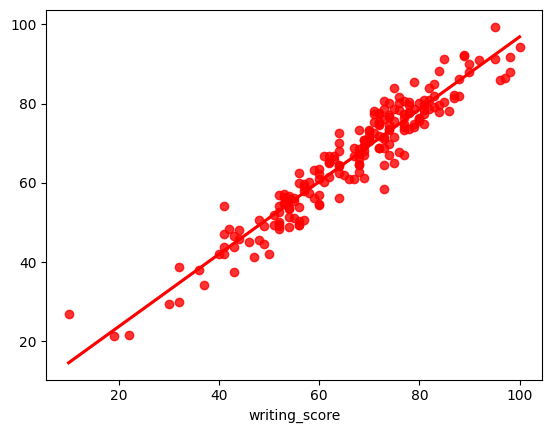

In [20]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,84,88.273361,-4.273361
737,73,68.782158,4.217842
740,72,74.563522,-2.563522
660,73,71.039474,1.960526
411,78,79.681000,-1.681000
...,...,...,...
408,56,62.519806,-6.519806
332,53,57.314949,-4.314949
208,76,78.455956,-2.455956
613,74,74.589020,-0.589020
